In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [35]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [37]:
# Load dataset with custom missing values
missing_values = ['na', 's']
df_clean = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv',
                 na_values=missing_values)

df_clean.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
print(df_clean['Regents Exam'].unique())

['Common Core Algebra' 'Living Environment' 'Common Core English'
 'Algebra2/Trigonometry' 'Common Core Algebra2' 'Common Core Geometry'
 'English' 'Geometry' 'Global History and Geography' 'Integrated Algebra'
 'Physical Settings/Chemistry' 'Physical Settings/Earth Science'
 'U.S. History and Government' 'Physical Settings/Physics' nan]


In [43]:
# Filter for High School, Common Core Algebra, and drop NaN in Mean Score
df_clean_filtered = df_clean[(df_clean["School Level"] == "High school") & (df_clean["Regents Exam"] == "Common Core Algebra")].dropna(subset=["Mean Score"])

#Isolate borough code and add column
df_clean_filtered["DBN Borough"] = df_clean_filtered["School DBN"].str[2]  # Extract borough code

In [44]:
df_clean_filtered.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR,DBN Borough
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3,11.0,91.7,1.0,8.3,0.0,0.0,0.0,0.0,M
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9,25.0,50.0,25.0,50.0,3.0,6.0,15.0,30.0,M
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5,15.0,28.3,38.0,71.7,6.0,11.3,29.0,54.7,M
62,01M448,University Neighborhood High School,High school,Common Core Algebra,2015,105,62.6,52.0,49.5,53.0,50.5,2.0,1.9,30.0,28.6,M
63,01M448,University Neighborhood High School,High school,Common Core Algebra,2016,148,68.2,42.0,28.4,106.0,71.6,19.0,12.8,74.0,50.0,M


In [56]:
# Picking Bronx High School of Science (DBN: 10X445)
school = df_clean_filtered[df_clean_filtered["School DBN"] == "10X445"]
school_stats = school["Mean Score"].describe()  # Descriptive stats for school

# Compare to Bronx borough (DBN Borough == "X")
bronx = df_clean_filtered[df_clean_filtered["DBN Borough"] == "X"]
bronx_stats = bronx["Mean Score"].describe()  # Descriptive stats for Bronx

# Print descriptive statistics
print("Bronx High School of Science Stats:")
print(school_stats)
print("\nBronx Borough High School Stats:")
print(bronx_stats)

Bronx High School of Science Stats:
count    26.000000
mean     89.157692
std       3.791799
min      83.200000
25%      85.125000
50%      89.350000
75%      92.375000
max      96.600000
Name: Mean Score, dtype: float64

Bronx Borough High School Stats:
count    3049.000000
mean       61.198524
std         6.844337
min        40.000000
25%        56.800000
50%        60.800000
75%        65.100000
max        96.600000
Name: Mean Score, dtype: float64


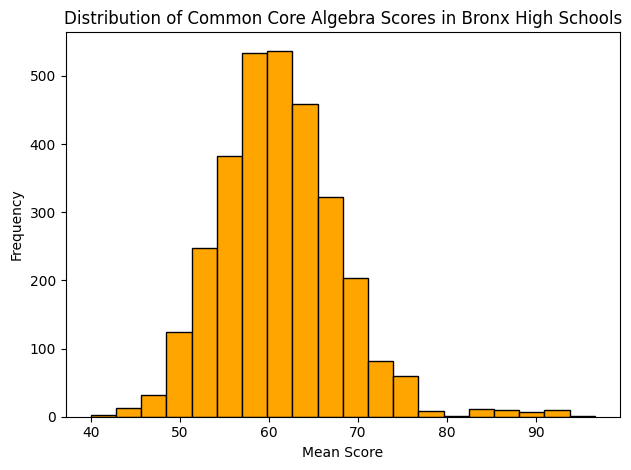

In [58]:
# Visualization: Histogram for Bronx borough high schools
plt.hist(bronx["Mean Score"], bins=20, edgecolor="black", color="orange")
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.title("Distribution of Common Core Algebra Scores in Bronx High Schools")
plt.tight_layout()
plt.show()

**Conclusion**
* Bronx High Schools are fairly concentrated around the mean for Common Core Algebra, but have a significant right tail.
* Scores for Bronx High School of Science lie on that right tail.
* It would be interesting to investigate how the populations of students compare (Average Bronx High School and Bronx High School of Science), when do students at Bronx High School of Science master Algebra, what are the requirements to be admitted to High School of Science

